# Principal Component Analysis

In this section we are going to learn in depth about how we can use one of the most important concept of machine learning i.e. *Principal Component Analysis* which plays an important role in dimesionality reduction, feature engineering, feature extractions. It also plays an important role in unsupervised learning.

Let's import some important libraries

In [1]:
#  base librarie
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

# Introduction to PCA

*PCA* is one of the most used and delivered method of unsupervised learning for dimensioanlity reduction which can be an important concept in the terms of feature engineering 

Let's take an example:

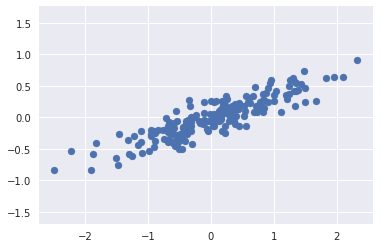

In [2]:
# making a dataset 
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T

# plotting of dataset 
plt.scatter(X[:,0],X[:,1])
plt.axis('equal');

By eye its clear that there exists an linear relationship between the components of the data points and with the help of X we can easily predict the values of y, but here senario is pretty different we are aiming to learn the features and the relationship between them so here comes the principle component analysis in the picture.

To achieve our goal we'll be using `PCA` class from the *Scikit-Learn* library.

In [3]:
# importing pca 
from sklearn.decomposition import PCA

# making a pca obj 
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:
# pca components 
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [5]:
# pca variacne
pca.explained_variance_

array([0.7625315, 0.0184779])

we are using components to define direction of vectors and using explained_variance we are showing squared sum of vectors

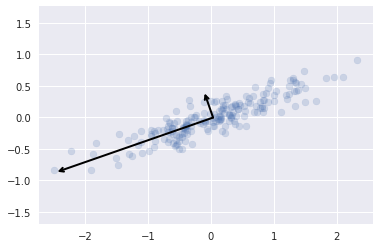

In [6]:
# make function to draw vectors
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

## PCA as dimensionality reduction

Using PCA for dimesionality reduction results in zeroing out of one or more data low principal components which results in lower dimesion projection leaving maximal data variance instances

Here is an example of dimesionality reduction:

In [7]:
# making an obj 
pca = PCA(n_components=1)

# fitting our data 
pca.fit(X)

# transformation of features 
X_pca = pca.transform(X)

# printing 
print("Original Shape :",X.shape)
print("Transformed shape :",X_pca.shape)

Original Shape : (200, 2)
Transformed shape : (200, 1)


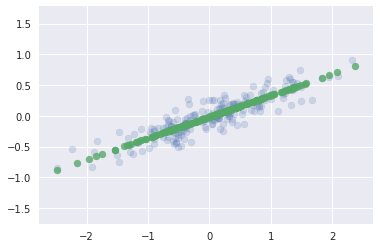

In [8]:
# performing reverse pca 
X_new = pca.inverse_transform(X_pca)

# plotting the curve 
plt.scatter(X[:,0],X[:,1],alpha=0.2)
plt.scatter(X_new[:,0],X_new[:,1],alpha=0.8)
plt.axis('equal');

# PCA for Visualization: HandWritten Digits

The usefullnes of PCA might not be that usefull in 2D data but can be very usefull when data is of High Dimensionality causing a high bump points to occur.

Lets start by loading our data:

In [9]:
# loading digits data 
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

Here we can see that image size is 8x8 so resulting in 64 dimensions in total, so with the help of PCA we can find the intution of our data sets and then reduce its dimesionality to make a better relationship mapping

In [17]:
# making an pca obj 
pca = PCA(2)

# transform_fit digit data 
projected = pca.fit_transform(digits.data)
print("Original Shape", digits.data.shape)
print("Projected Shape",projcted.shape)

Original Shape (1797, 64)
Projected Shape (1797, 2)


Now lets plot these first two components of our projected axis

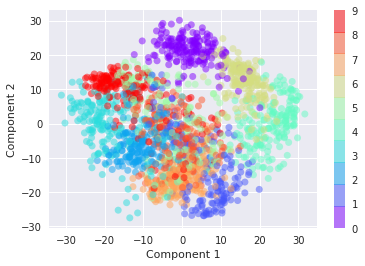

In [22]:
# making a scatter plot 
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('rainbow',10))

# plot labels 
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();